# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] - 273.15
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hofn
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | chernyshevskiy
Processing Record 4 of Set 1 | provideniya
Processing Record 5 of Set 1 | shache
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | te anau
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 14 of Set 1 | acari
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | hualmay
Processing Record 18 of Set 1 | yeppoon
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | porto novo
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | mahebourg
Processing R

In [16]:
city_weather = requests.get(city_url).json()
print(city_weather)

{'coord': {'lon': 55.3047, 'lat': 25.2582}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 310.15, 'feels_like': 309.14, 'temp_min': 310.11, 'temp_max': 310.31, 'pressure': 1013, 'humidity': 23}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 210}, 'clouds': {'all': 0}, 'dt': 1681369736, 'sys': {'type': 1, 'id': 7537, 'country': 'AE', 'sunrise': 1681351115, 'sunset': 1681396792}, 'timezone': 14400, 'id': 292223, 'name': 'Dubai', 'cod': 200}


In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hofn,64.2539,-15.2082,4.18,85,100,7.61,IS,1681371094
1,tiksi,71.6872,128.8694,-17.50,93,100,1.32,RU,1681371094
2,chernyshevskiy,63.0128,112.4714,-6.16,71,100,3.84,RU,1681371095
3,provideniya,64.3833,-173.3000,-19.61,98,70,2.56,RU,1681371095
4,shache,38.4167,77.2406,22.86,13,85,3.28,CN,1681371095


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [53]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
display(city_data_df.head(30))

timestamp = 1681371102
date = time.strftime('%Y-%m-%d', time.localtime(timestamp))
print(date)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hofn,64.2539,-15.2082,4.18,85,100,7.61,IS,1681371094
1,tiksi,71.6872,128.8694,-17.50,93,100,1.32,RU,1681371094
2,chernyshevskiy,63.0128,112.4714,-6.16,71,100,3.84,RU,1681371095
3,provideniya,64.3833,-173.3000,-19.61,98,70,2.56,RU,1681371095
4,shache,38.4167,77.2406,22.86,13,85,3.28,CN,1681371095
5,sitka,57.0531,-135.3300,5.94,61,100,5.66,US,1681371096
6,te anau,-45.4167,167.7167,10.61,94,61,1.31,NZ,1681371096
7,rikitea,-23.1203,-134.9692,25.44,72,100,6.02,PF,1681371096
8,ponta do sol,32.6667,-17.1000,18.34,74,21,2.22,PT,1681370956


2023-04-13


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

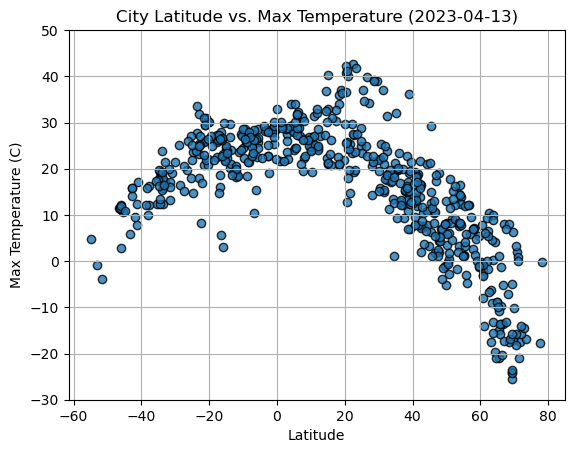

In [51]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.8)


plt.title("City Latitude vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


plt.ylim(-30, 50)

plt.grid(True)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

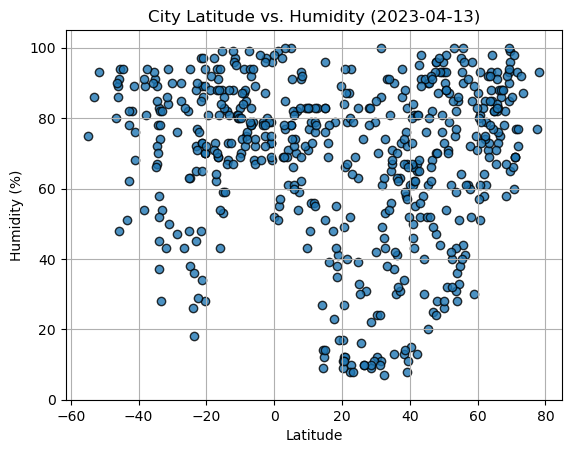

In [52]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.8)


plt.title("City Latitude vs. Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


plt.ylim(0, 105)

plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

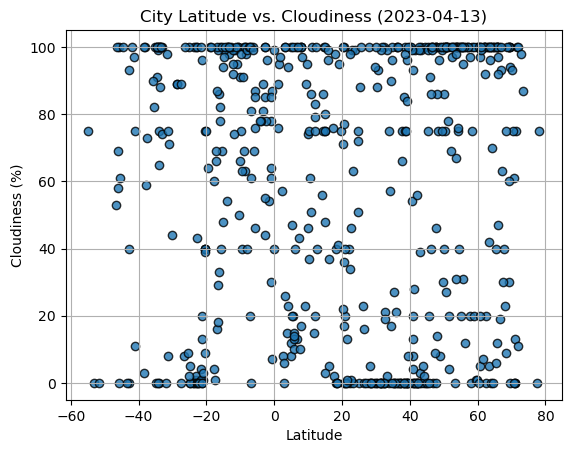

In [55]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.8)


plt.title("City Latitude vs. Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

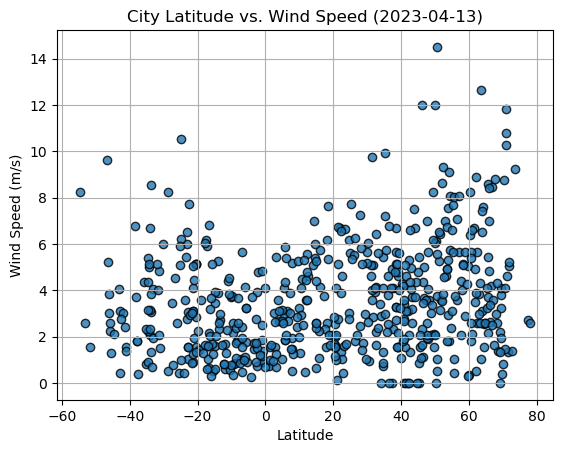

In [56]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.8)


plt.title("City Latitude vs. Wind Speed (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df= city_data_df[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hofn,64.2539,-15.2082,4.18,85,100,7.61,IS,1681371094
1,tiksi,71.6872,128.8694,-17.50,93,100,1.32,RU,1681371094
2,chernyshevskiy,63.0128,112.4714,-6.16,71,100,3.84,RU,1681371095
3,provideniya,64.3833,-173.3000,-19.61,98,70,2.56,RU,1681371095
4,shache,38.4167,77.2406,22.86,13,85,3.28,CN,1681371095


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df= city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,te anau,-45.4167,167.7167,10.61,94,61,1.31,NZ,1681371096
7,rikitea,-23.1203,-134.9692,25.44,72,100,6.02,PF,1681371096
10,vaini,-21.2000,-175.2000,26.09,89,20,4.12,TO,1681371097
12,acari,-15.4311,-74.6158,21.82,88,69,0.52,PE,1681371098
14,port elizabeth,-33.9180,25.5701,19.16,58,0,6.69,ZA,1681371099


###  Temperature vs. Latitude Linear Regression Plot

The r-values is: -0.8448473859974631


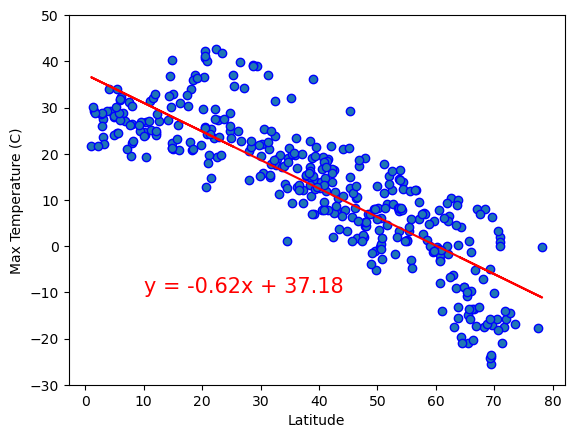

In [68]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolor="Blue", alpha=1)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


plt.ylim(-30, 50)

plt.grid(False)
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,r_values,"r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
print("The r-values is: "+ str(rvalue))
plt.show()

The r-values is: 0.6784311051538882


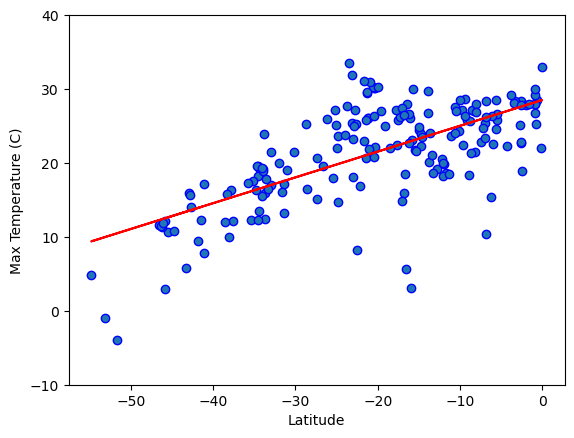

In [70]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolor="Blue", alpha=1)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


plt.ylim(-10, 40)

plt.grid(False)
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,r_values,"r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
print("The r-values is: "+ str(rvalue))
plt.show()

**Discussion about the linear relationship:** 

Based on the scatter plots, it can be concluded that as the latitude gets closer to zero, the maximum air temperature tends to increase, and as the latitude gets further away from zero, the maximum air temperature tends to decrease. As a result, it can be observed that at latitudes greater than 60 and less than -50, the highest temperatures are more often less than 0.





### Humidity vs. Latitude Linear Regression Plot

The r-values is: 0.22787592130355744


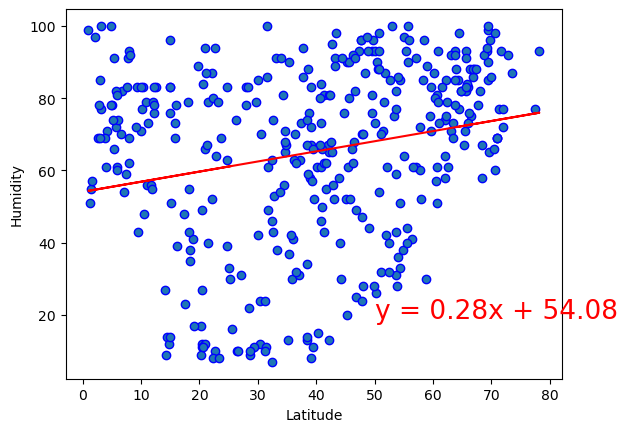

In [80]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolor="Blue", alpha=1)

plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid(False)
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,r_values,"r-")
plt.annotate(line_eq,(50,19),fontsize=19,color="red")
print("The r-values is: "+ str(rvalue))
plt.show()

The r-values is: 0.1066279125614453


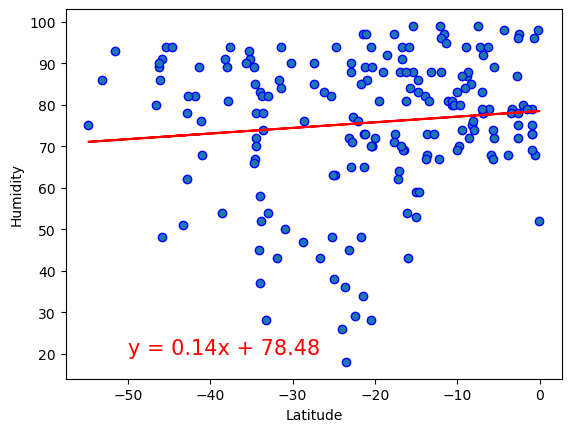

In [77]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolor="Blue", alpha=1)

plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid(False)
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,r_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print("The r-values is: "+ str(rvalue))
plt.show()

**Discussion about the linear relationship:** Based on the scatter plots, it can be concluded that measuring humidity levels based on latitude alone is not a suitable parameter for statistical analysis. While latitude can be a contributing factor, other variables such as temperature also play significant roles in determining humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-values is: 0.14977131419343576


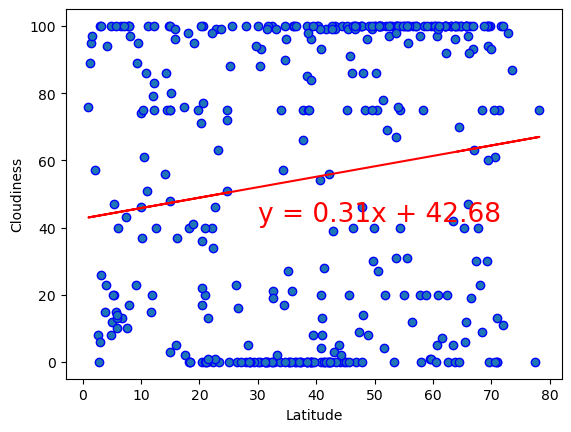

In [92]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], edgecolor="Blue", alpha=1)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.grid(False)
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,r_values,"r-")
plt.annotate(line_eq,(30,42),fontsize=19,color="red")
print("The r-values is: "+ str(rvalue))
plt.show()

The r-values is: 0.16879649981651865


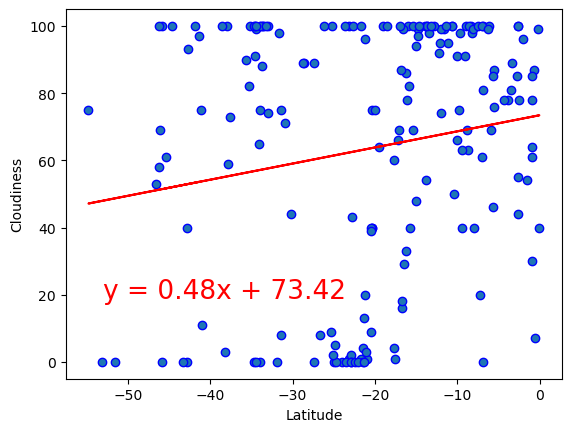

In [88]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolor="Blue", alpha=1)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.grid(False)
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,r_values,"r-")
plt.annotate(line_eq,(-53,19),fontsize=19,color="red")
print("The r-values is: "+ str(rvalue))
plt.show()

**Discussion about the linear relationship:** Based on the scatter plots, we can see that there is a slight trend for increased cloudiness as we move away from the equator towards the poles, in both the Northern and Southern Hemisphere. However, as with the relationship between humidity and latitude, the weak correlation between latitude and cloudiness indicates that other factors also play a significant role in determining cloudiness levels. The difference in correlation values between the hemispheres is relatively small, indicating that latitude affects cloudiness similarly in both hemispheres. To better understand the relationship between latitude and cloudiness, it's essential to consider multiple factors together.





### Wind Speed vs. Latitude Linear Regression Plot

The r-values is: 0.2147005349097698


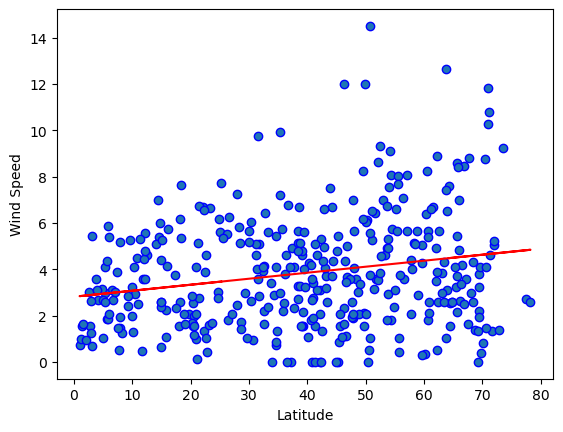

In [93]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolor="Blue", alpha=1)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.grid(False)
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,r_values,"r-")
plt.annotate(line_eq,(30,42),fontsize=19,color="red")
print("The r-values is: "+ str(rvalue))
plt.show()

The r-values is: -0.25895422590660633


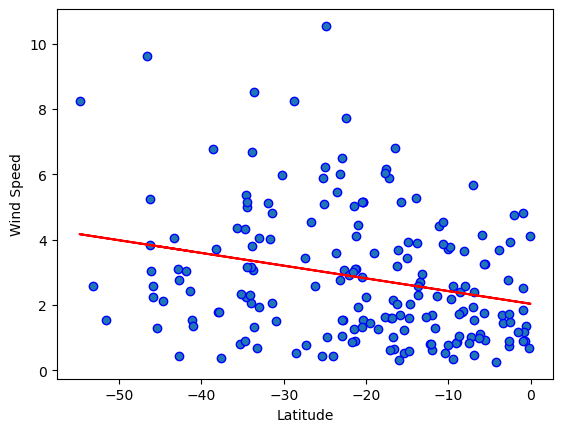

In [94]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolor="Blue", alpha=1)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.grid(False)
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,r_values,"r-")
plt.annotate(line_eq,(30,42),fontsize=19,color="red")
print("The r-values is: "+ str(rvalue))
plt.show()

**Discussion about the linear relationship:** Based on the scatter plots, we can observe a weak correlation between latitude and wind speed in both hemispheres. In the Northern Hemisphere, the correlation coefficient (r-value) between latitude and wind speed is 0.214, indicating a slightly positive correlation between these two variables. However, in the Southern Hemisphere, the correlation coefficient is -0.258, suggesting a slightly negative correlation between latitude and wind speed.
As with cloudiness and humidity, other factors may play a more significant role in determining wind speed. To gain a better understanding of the relationship between latitude and wind speed, it is necessary to consider multiple factors together.